In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
day0 = pd.read_csv("prices_round_4_day_1.csv", sep = ';')
day1 = pd.read_csv("prices_round_4_day_2.csv", sep = ';')
day2 = pd.read_csv("prices_round_4_day_3.csv", sep = ';')

day1["timestamp"] += 1000000
day2["timestamp"] += 2000000

all_data = pd.concat([day0, day1, day2])
all_data = all_data.set_index("timestamp")

In [21]:
coconut_mid = all_data[all_data["product"] == "COCONUT"]["mid_price"]
coconut_coup_mid = all_data[all_data["product"] == "COCONUT_COUPON"]["mid_price"]

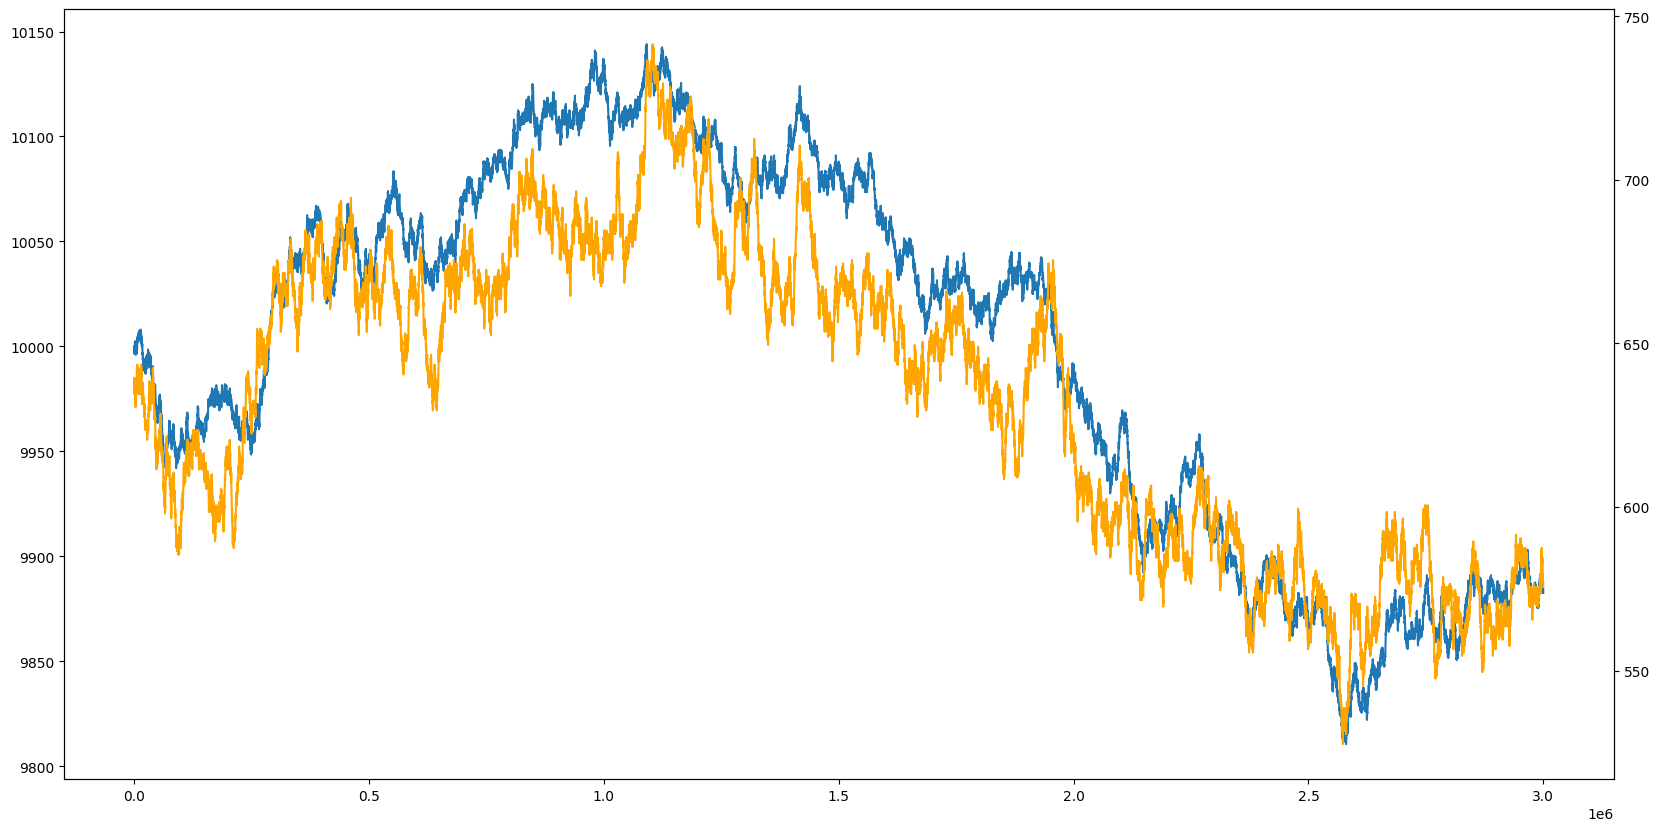

In [23]:
fig, ax1 = plt.subplots(figsize = (20, 10))
ax1.plot(coconut_mid)
ax2 = ax1.twinx()
ax2.plot(coconut_coup_mid, c = "orange")
plt.show()

In [24]:
import numpy as np
from scipy.stats import norm

N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)


In [25]:
coconut_mid.pct_change()

timestamp
0               NaN
100       -0.000050
200       -0.000100
300        0.000100
400       -0.000100
             ...   
2999500   -0.000051
2999600    0.000101
2999700   -0.000101
2999800    0.000051
2999900   -0.000152
Name: mid_price, Length: 30000, dtype: float64

In [27]:
coconut_mid.std()

88.75414439509287

In [ ]:
puts, calls = [], []
for i in range(len(coconut_mid)):
    puts.append(BS_PUT(coconut_mid.iloc[i], coconut_coup_mid.iloc[i], 637.67, (3000000 - coconut_mid.iloc[i].index) / 1000, ))